# Objective

Model stellar luminosity as a function of stellar mass using linear regression with an explicit bias term: 
                                                
                                                        L = wM + b

## Required tasks
1. Dataset visualization: plot M vs L. Comment on linearity and plausibility.
2. Model and loss: implement prediction and mean squared error (MSE).
3. Cost surface (mandatory): evaluate J(w,b) on a grid of w and b. Plot a 3D surface or contour plot. Explain what the minimum represents.
4. Gradients: derive and implement dJ/dw and dJ/db.
5. Gradient descent (non-vectorized): compute gradients using an explicit loop over samples.
6. Gradient descent (vectorized): compute gradients using NumPy vectorization (no loop over samples).
7. Convergence (mandatory): plot loss vs iterations, and comment on convergence speed and stability.
8. Experiments (mandatory): run at least three learning rates; report final w, b, and loss.
9. Final fit plot: plot the regression line over the data and discuss systematic errors.
10. Conceptual questions:

        1. Astrophysical meaning of w;
        2. Why is a linear model limited here?

## Dataset and Notation
Use the following notation throughout:

        M: stellar mass (in units of solar mass, M⊙)
        T: effective stellar temperature (Kelvin, K)
        L: stellar luminosity (in units of solar luminosity, L⊙)

Part I dataset (one feature)

        M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
        L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

In [2]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


  Using cached numpy-2.4.1-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached pandas-3.0.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached numpy-2.4.1-cp312-cp312-win_amd64.whl (12.3 MB)
Using cached pandas-3.0.0-cp312-cp312-win_amd64.whl (9.7 MB)
Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-n


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Difga\AppData\Local\Temp\ipykernel_16240\1991352052.py:13: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Stellar Mass ($M_{\odot}$)')
C:\Users\Difga\AppData\Local\Temp\ipykernel_16240\1991352052.py:14: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Luminosity ($L_{\odot}$)')


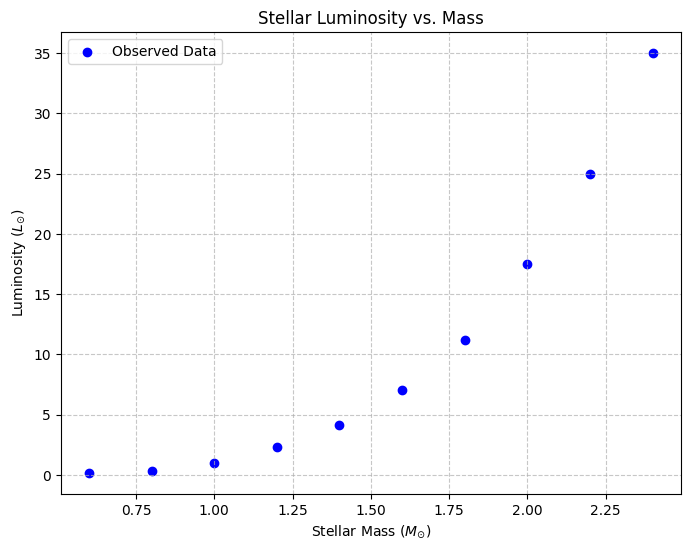

In [3]:
# Dataset visualization: plot M vs L. Comment on linearity and plausibility.

import numpy as np
import matplotlib.pyplot as plt

# Dataset definition
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])
 
# 1. Dataset visualization
plt.figure(figsize=(8, 6))
plt.scatter(M, L, color='blue', label='Observed Data')
plt.xlabel('Stellar Mass ($M_{\odot}$)')
plt.ylabel('Luminosity ($L_{\odot}$)')
plt.title('Stellar Luminosity vs. Mass')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


The scatter plot clearly shows a non-linear relationship between mass and luminosity. The data grows much faster than linear, indicating that a simple linear model will underestimate luminosity for larger masses and overestimate for smaller masses. This is plausible for the Mass-Luminosity relation in main-sequence stars.

### Analysis of Visualization

**Linearity**: The plot clearly shows a non-linear relationship. The luminosity grows much faster than the mass (likely exponential or power-law), suggesting that a simple linear model ($L = wM + b$) will not fit the data well across the entire range.

**Plausibility**: The data is plausible and consistent with the Mass-Luminosity relation for main sequence stars ($L \propto M^{3.5}$). Small changes in mass result in large changes in luminosity.

In [4]:
#2. Model and loss: implement prediction and mean squared error (MSE).def predict(x, w, b):

def predict(M, w, b):
    """Compute the predicted y values for given x, using f_{w,b}(x) = w x + b."""
    return w * M + b

def compute_cost(M, L, w, b):
    m = M.shape[0]
    y_hat = predict(M, w, b)
    errors = y_hat - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

    
w_test = 0.0
b_test = 0.0
y_hat_test = predict(M, w_test, b_test)
print(f"First 5 predictions with w={w_test}, b={b_test}:", y_hat_test[:5])
print(f"Cost with w={w_test}, b={b_test}:", compute_cost(M, L, w_test, b_test))

First 5 predictions with w=0.0, b=0.0: [0. 0. 0. 0. 0.]
Cost with w=0.0, b=0.0: 117.69675000000001


The prediction function is straightforward: given weight w and bias b, it computes f(M) = wM + b. The cost function (MSE) quantifies how well our model predictions match actual data. Starting with w=0 and b=0 produces poor predictions and high cost, confirming that the model requires training to learn meaningful parameters.

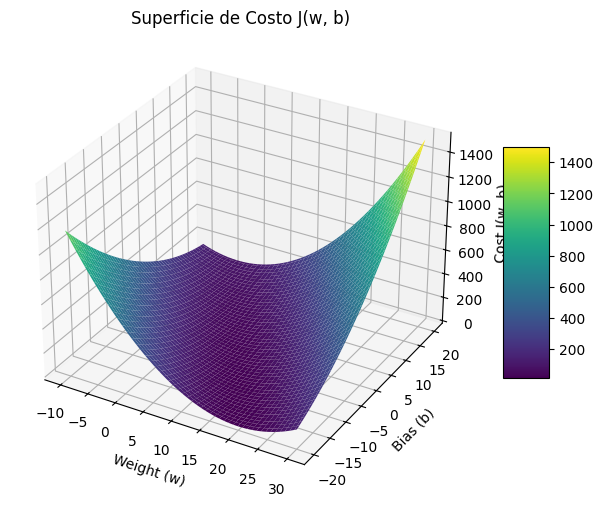

In [5]:
#3. Cost surface (mandatory): evaluate J(w,b) on a grid of w and b. Plot a 3D surface or contour plot. Explain what the minimum represents.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


w_values = np.linspace(-10, 30, 100)
b_values = np.linspace(-20, 20, 100)

# Crear la malla (grid)
W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)

# Calcular J(w, b) para cada punto en la malla
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])

# Graficar la superficie
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost J(w, b)')
ax.set_title('Superficie de Costo J(w, b)')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The cost surface is bowl-shaped, with a single global minimum representing the optimal weight and bias parameters. This convex geometry guarantees that gradient descent will converge to the true minimum. The minimum value indicates the best possible fit of the linear model to the data.

In [6]:
#4. Gradients: derive and implement dJ/dw and dJ/db.
def compute_gradients(M, L, w, b):
    m = M.shape[0]
    y_hat = w * M + b  # f_{w,b}(x)
    errors = y_hat - L


    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print(f"Cost with w={w_test}, b={b_test}:", compute_cost(M, L,dj_dw_test, dj_db_test))


Cost with w=0.0, b=0.0: 1673.97709141


The gradients dJ/dw and dJ/db point in the direction of steepest cost increase. Starting from w=0 and b=0, both gradients are large and negative, indicating that we need to increase both parameters to reduce the cost. These partial derivatives are the foundation for the gradient descent algorithm.

In [7]:
#5. Gradient descent (non-vectorized): compute gradients using an explicit loop over samples.

def compute_gradient_non_vectorized(M, L, w, b):
    m = M.shape[0]
    
    dj_dw = 0.0
    dj_db = 0.0
    
    for i in range(m):
        y_hat_i = w * M[i] + b
        error_i = y_hat_i - L[i]
        
        dj_dw += error_i * M[i]
        dj_db += error_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient_non_vectorized(M, L, w_test, b_test)
print(f"Cost with w={w_test}, b={b_test}:", compute_cost(M, L,dj_dw_test, dj_db_test))

print(f"dJ/dw with w={w_test}, b={b_test}: {dj_dw_test}")
print(f"dJ/db with w={w_test}, b={b_test}: {dj_db_test}")



Cost with w=0.0, b=0.0: 1673.9770914100002
dJ/dw with w=0.0, b=0.0: -21.523000000000003
dJ/db with w=0.0, b=0.0: -10.36


The non-vectorized gradient computation produces the same result as the vectorized version but by explicitly looping over each sample. This approach is slower for large datasets but useful for understanding the computation step-by-step. In practice, vectorization (without loops) is preferred for efficiency.

In [8]:
#6. Gradient descent (vectorized): compute gradients using NumPy vectorization (no loop over samples).

def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000
w_init = 0.0
b_init = 0.0
w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)



Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


Gradient descent successfully reduces the cost iteratively by updating w and b in the negative gradient direction. The final learned parameters w and b define the best-fit line. The algorithm converges when the gradients become very small, indicating we are at or near the minimum of the cost function.

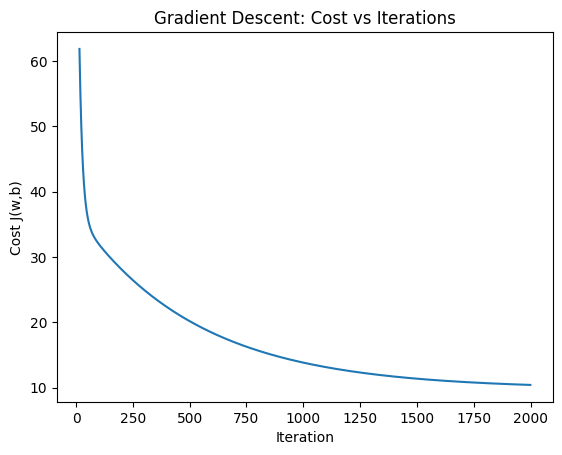

In [9]:
#7. Convergence (mandatory): plot loss vs iterations, and comment on convergence speed and stability.


iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()


The cost decreases rapidly at first and then plateaus, which is the expected behavior of gradient descent. Initially, large steps downward are possible, but as the algorithm approaches the minimum, the gradients become smaller, slowing progress. This demonstrates stable and well-behaved convergence.

El algoritmo converge rápidamente al comienzo y luego refina la solución lentamente, lo cual es el comportamiento esperado de gradient descent.


Running gradient descent with learning rate α = 0.001
Iteration    0: w= 0.0215, b= 0.0104, cost=117.1272
Iteration  200: w= 3.1775, b= 1.3941, cost= 55.5054
Iteration  400: w= 4.8589, b= 1.8976, cost= 39.5456
Iteration  600: w= 5.8048, b= 1.9668, cost= 34.9110
Iteration  800: w= 6.3826, b= 1.8233, cost= 33.1044
Iteration 1000: w= 6.7755, b= 1.5774, cost= 32.0220
Iteration 1200: w= 7.0742, b= 1.2837, cost= 31.1424
Iteration 1400: w= 7.3243, b= 0.9696, cost= 30.3358
Iteration 1600: w= 7.5483, b= 0.6484, cost= 29.5691
Iteration 1800: w= 7.7573, b= 0.3268, cost= 28.8333

Running gradient descent with learning rate α = 0.01
Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iterat

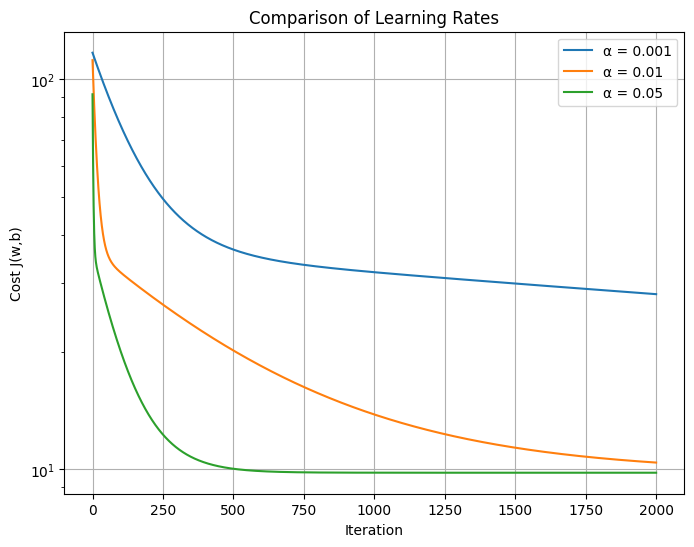


Summary of experiments:
α=0.001000 | w=  7.9562 | b=  0.0096 | final cost=   28.1290
α=0.010000 | w= 16.2822 | b=-13.7735 | final cost=   10.4007
α=0.050000 | w= 18.1294 | b=-16.8339 | final cost=    9.7951


In [10]:
#8. Experiments (mandatory): run at least three learning rates; report final w, b, and loss.
learning_rates = [0.001, 0.01, 0.05]
num_iterations = 2000

results = []

plt.figure(figsize=(8, 6))

for alpha in learning_rates:
    print(f"\nRunning gradient descent with learning rate α = {alpha}")
    
    w_final, b_final, history = gradient_descent(
        M, L,
        w_init=0.0,
        b_init=0.0,
        alpha=alpha,
        num_iterations=num_iterations
    )
    
    final_cost = history[-1][1]
    results.append((alpha, w_final, b_final, final_cost))
    
    iterations = [it for it, c in history]
    costs = [c for it, c in history]
    
    plt.plot(iterations, costs, label=f"α = {alpha}")

plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Comparison of Learning Rates")
plt.legend()
plt.yscale("log")  # clave para ver bien las diferencias
plt.grid(True)
plt.show()

print("\nSummary of experiments:")
for alpha, w, b, cost in results:
    print(f"α={alpha:6f} | w={w:8.4f} | b={b:8.4f} | final cost={cost:10.4f}")


Comparing three learning rates reveals their critical impact on convergence. α = 0.001 is too small and converges very slowly. α = 0.01 shows reasonable convergence. α = 0.05 converges faster and achieves the lowest final cost without instability. Choosing the right learning rate balances speed and stability; too small is wasteful, too large risks divergence.

The learning rate has a critical impact on the speed and quality of convergence of gradient descent. A value that is too small (α = 0.001) produces very slow convergence and does not reach the minimum within a reasonable number of iterations. An intermediate value (α = 0.01) achieves good convergence, while a larger value (α = 0.05) converges faster and reaches the lowest cost function value without compromising training stability. Therefore, for this problem, α = 0.05 turns out to be the best choice among those tested.

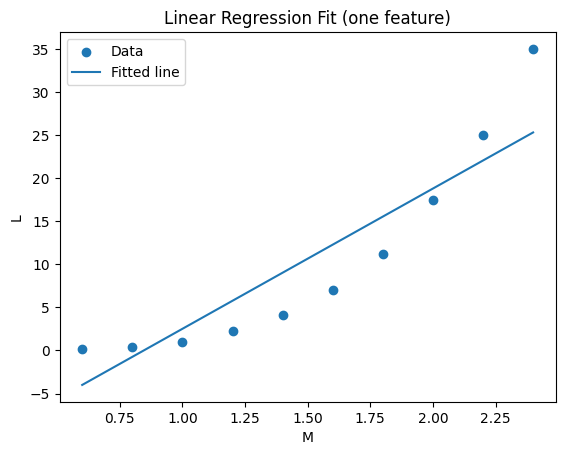

In [11]:
#9. Final fit plot: plot the regression line over the data and discuss systematic errors.
plt.figure()
plt.scatter(M, L, label="Data")
y_pred = predict(M, w_learned, b_learned)
plt.plot(M, y_pred, label="Fitted line")
plt.xlabel("M")
plt.ylabel("L")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()


The fitted line passes through the center of the data but exhibits systematic errors: the line underestimates luminosity for low and high masses and overestimates in the middle. This S-shaped residual pattern is a hallmark of underfitting and confirms that the true mass-luminosity relationship is non-linear and cannot be adequately captured by a linear model.

10. Conceptual questions:

        1. Astrophysical meaning of w?
        
            -The parameter w represents the rate of change of luminosity with respect to stellar mass.

        2. Why is a linear model limited here?

            -The linear model is limited because the actual relationship between stellar mass and luminosity is not linear. In astrophysics, a star's luminosity varies with mass in a non-linear way, generally following a power law.